In [1]:
from sklearn import tree
from itertools import product
from PIL import Image
import gdal
import numpy as np
import matplotlib.pyplot as plot
from gdalconst import*
from osgeo import ogr
import numpy as np
from sklearn import metrics
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import random
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek 

In [2]:
#4 creating variables for band files taken from the landscape file of 2012
#4 bands include - Elevation, Aspect, Slope, Fuel Model Number

#year 2012
band1_12 = '/home/skhatter/exp1/us_130lcp13/band1_.tif'
band2_12 = '/home/skhatter/exp1/us_130lcp13/band2_.tif'
band3_12 = '/home/skhatter/exp1/us_130lcp13/band3_.tif'
band4_12 = '/home/skhatter/exp1/us_130lcp13/band4_.tif'


#this file has cumulative fire frequencies from 1992 - 2012
fireFreq = '/home/skhatter/exp2/summation/fire92_12_.tif'

#opening all the band files using gdal
dataset1_12 = gdal.Open(band1_12, GA_ReadOnly)
dataset2_12 = gdal.Open(band2_12, GA_ReadOnly)
dataset3_12 = gdal.Open(band3_12, GA_ReadOnly)
dataset4_12 = gdal.Open(band4_12, GA_ReadOnly)
dataset_fireFreq = gdal.Open(fireFreq, GA_ReadOnly)

In [3]:
#getting individual bands for 2012
band_fireFreq = dataset_fireFreq.GetRasterBand(1)
band1_12 = dataset1_12.GetRasterBand(1)
band2_12 = dataset2_12.GetRasterBand(1)
band3_12 = dataset3_12.GetRasterBand(1)
band4_12 = dataset4_12.GetRasterBand(1)

#get data in the numpy arrays for 2012
data_fireFreq =  np.array(band_fireFreq.ReadAsArray(0,0,band_fireFreq.XSize, band_fireFreq.YSize)) 
data1_12 = np.array(band1_12.ReadAsArray())
data2_12 = np.array(band2_12.ReadAsArray(0,0,band2_12.XSize, band2_12.YSize))
data3_12 = np.array(band3_12.ReadAsArray(0,0,band3_12.XSize, band3_12.YSize))
data4_12 = np.array(band4_12.ReadAsArray(0,0,band4_12.XSize, band4_12.YSize))


In [4]:
#Reshaping the arrays

data1_12 = data1_12.flatten()
data2_12 = np.reshape(data2_12, data2_12.size, order='F')
data3_12 = np.reshape(data3_12, data3_12.size, order='F')
data4_12 = np.reshape(data4_12, data4_12.size, order='F')
data_fireFreq = np.reshape(data_fireFreq, data_fireFreq.size, order='F')

In [5]:
#Creating variables for Fire Parameters

#file for 2013-14 - this file has 1/0 if the fire happened in 2013-2014/ or not
fireParamFile_14 = '/home/skhatter/exp1/fire2014/fire2014_.tif'


#opening the files using gdal
fireDataset_14 = gdal.Open(fireParamFile_14, GA_ReadOnly)


#getting the raster band 1 from all the 4 datasets
fireBand1_14 = fireDataset_14.GetRasterBand(1)


#converting the rasterized values in arrays
data5_14 =  np.array(fireBand1_14.ReadAsArray(0,0,fireBand1_14.XSize, fireBand1_14.YSize))


#reshaping the arrays
data5_14 = np.reshape(data5_14, data5_14.size, order='F')

In [6]:
#creating feature vector using complete data
#5 FEATURES-  Fire Frequency, Elevation, Slope, Aspect, Fuel Model Number
data_t = []
data_t.append(data_fireFreq)
data_t.append(data1_12)
data_t.append(data2_12)
data_t.append(data3_12)
data_t.append(data4_12)
data = np.array(data_t)
print(data.shape)
data = data.T

#feature vector is X
X = data

#target vector is y
y = data5_14

print('Original dataset Shape {}'.format(Counter(y)))

(5, 4665108)
Original dataset Shape Counter({0.0: 4596878, 1.0: 68230})


In [7]:
#creating test set and training set  using train_test_split
#Split arrays or matrices into random train and test subsets in ratios 80:20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)


print('Training Set Shape {}'.format(Counter(y_train)))

Training Set Shape Counter({0.0: 3677502, 1.0: 54584})


In [8]:
#Using default decision tree classifier
classifier_original = tree.DecisionTreeClassifier()

In [9]:
#Solving Class Imbalance problem using- SMOTETomek

smotetomek = SMOTETomek(random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_sample(X_train, y_train)

In [10]:
print('Smotetomek Set Shape {}'.format(Counter(y_smotetomek)))

Smotetomek Set Shape Counter({0.0: 3677502, 1.0: 3669641})


In [11]:
#Fitting the smote'd samples on classifier_original
classifier_original = classifier_original.fit(X_smotetomek, y_smotetomek)

y_pred = classifier_original.predict(X_test)

In [12]:
print('Test Set Shape {}'.format(Counter(y_test)))

Test Set Shape Counter({0.0: 919376, 1.0: 13646})


Confusion matrix, without normalization
[[899858  19518]
 [ 11436   2210]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.84  0.16]]


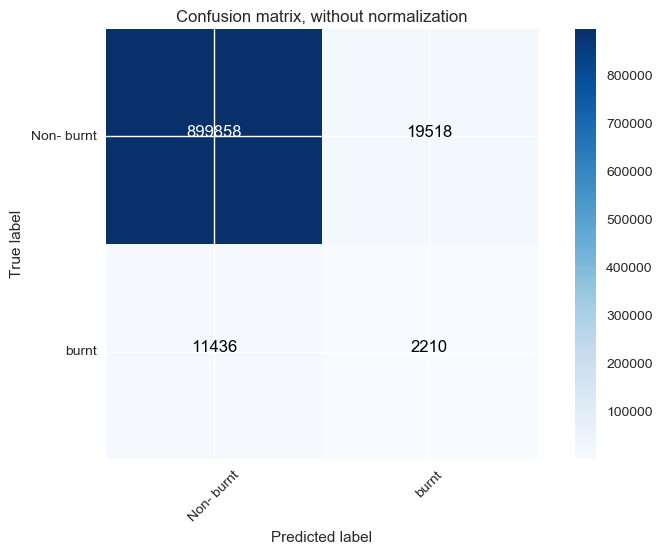

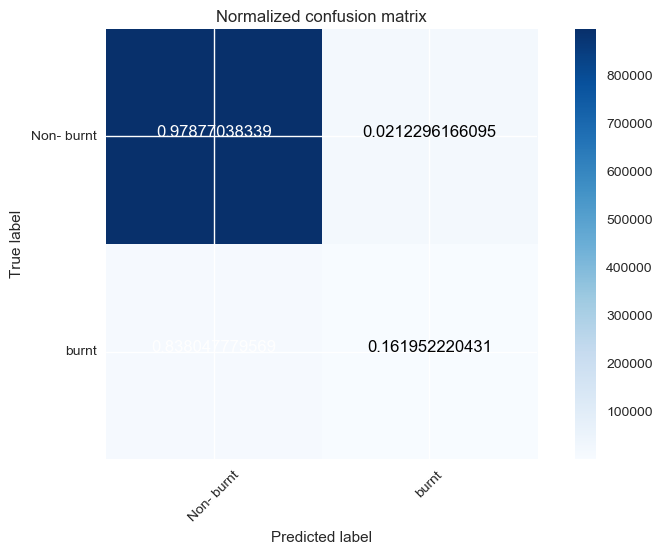

In [13]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

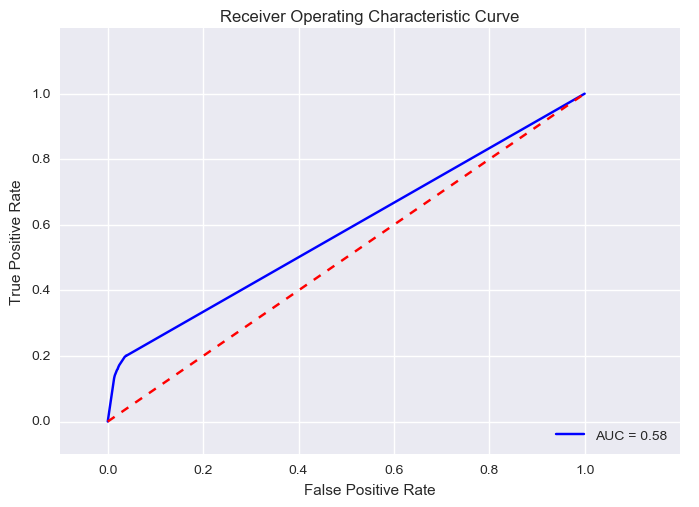

In [14]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = classifier_original.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)



plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
